这个项目的目的是通过数据清理和分析，找出在2019里最热门的数据科学问题。

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#读取数据
science_questions = pd.read_csv("2019_questions.csv", parse_dates=["CreationDate"])
science_questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             8839 non-null   int64         
 1   CreationDate   8839 non-null   datetime64[ns]
 2   Score          8839 non-null   int64         
 3   ViewCount      8839 non-null   int64         
 4   Tags           8839 non-null   object        
 5   AnswerCount    8839 non-null   int64         
 6   FavoriteCount  1407 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


In [3]:
science_questions.dtypes

Id                        int64
CreationDate     datetime64[ns]
Score                     int64
ViewCount                 int64
Tags                     object
AnswerCount               int64
FavoriteCount           float64
dtype: object

1. Id: An identification number for the post. （每个post的ID）
2. PostTypeId: An identification number for the type of post.（每一种类型的post的ID）
3. CreationDate: The date and time of creation of the post. （post的开发时间）
4. Score: The post's score. （post的分数）
5. ViewCount: How many times the post was viewed. （post被查看了多少次）
6. Tags: What tags were used. 
7. AnswerCount: How many answers the question got (only applicable to question posts).
8. FavoriteCount: How many times the question was favored (only applicable to question posts).

In [4]:
#找出空值，进行数据清理
science_questions.isnull().sum()

Id                  0
CreationDate        0
Score               0
ViewCount           0
Tags                0
AnswerCount         0
FavoriteCount    7432
dtype: int64

In [5]:
print(science_questions["FavoriteCount"].head(10))

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    1.0
7    NaN
8    NaN
9    NaN
Name: FavoriteCount, dtype: float64


We see that only FavoriteCount has missing values(7432).A missing value on this column probably means that the question was is not present in any users' favorite list,so we can replace the missing values with zero.

我们看到只有FavoriteCount这一列里有空值（7432）。此列上的丢失值可能意味着该问题不在任何用户的收藏夹列表中，因此我们可以将丢失的值替换为零。

In [6]:
science_questions["FavoriteCount"].fillna(0,inplace = True)

In [7]:
science_questions.isnull().sum()

Id               0
CreationDate     0
Score            0
ViewCount        0
Tags             0
AnswerCount      0
FavoriteCount    0
dtype: int64

In [8]:
science_questions["FavoriteCount"] = science_questions["FavoriteCount"].astype(int)
science_questions.dtypes

Id                        int64
CreationDate     datetime64[ns]
Score                     int64
ViewCount                 int64
Tags                     object
AnswerCount               int64
FavoriteCount             int32
dtype: object

In [9]:
science_questions["Tags"] = science_questions["Tags"].str.replace("<", "").str.replace(">"," ").str.split()
science_questions.sample(3)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
7269,64823,2019-12-14 09:43:59,-1,17,"[machine-learning, clustering, lstm, bigdata, ...",1,0
1947,46886,2019-03-07 04:52:56,1,76,"[tensorflow, keras]",1,0
2415,58577,2019-09-03 00:52:15,9,2328,"[machine-learning, keras, scikit-learn]",3,6


Question（需要分析的问题）:
1. Count how many times each tag was used.（计算每个标签使用了多少次）
2. Count how many times each tag was viewed. （计算出该每一类帖子被查看了多少次）
3. Create visualizations for the top tags of each of the above results. （用最合适的图来显示上面两个问题的结果）

In [10]:
#We create a dictionary for first problems.
# 新建一个dictionary 用于第一个问题
dict_tag = {}

for tags in science_questions["Tags"]:
    for tag in tags:
        if tag in dict_tag:
            dict_tag[tag] += 1
        else:
            dict_tag[tag] = 1

#Create and convert a dict to a DataFrame.
most_used = pd.DataFrame.from_dict(dict_tag,orient='index', columns = ['Count'])
most_used.sort_values("Count", ascending = False,inplace = True)
most_used.head(15)

,Count
machine-learning,2693
python,1814
deep-learning,1220
neural-network,1055
keras,935
classification,685
tensorflow,584
scikit-learn,540
nlp,493
cnn,489


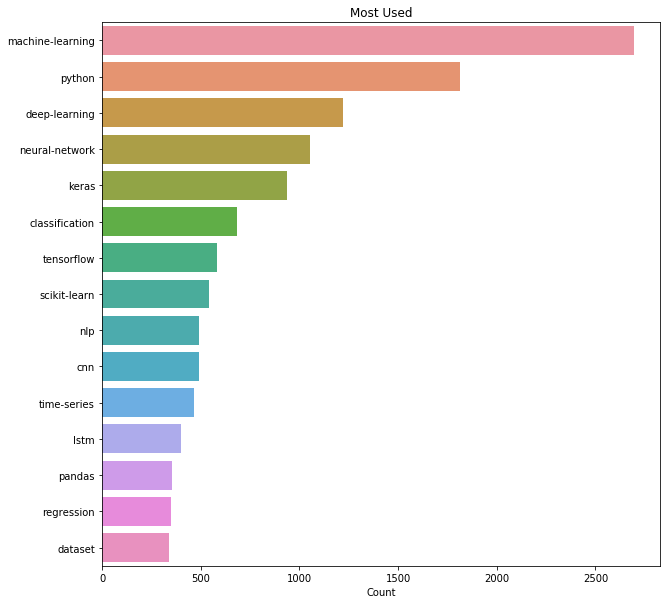

In [11]:
#Graph the first 15 rows.（用图像显示前15行）

fig, ax = plt.subplots(figsize = (10,10))
ax = sns.barplot(x = most_used.head(15).Count, y = most_used.head(15).index)
plt.title("Most Used") #最多人用的标签
plt.show()

通过图表，我们可以发现机器学习，python和深度学习是最多人问或者讨论的话题。

In [12]:
#Use ViewCount columns for the Second problem. （第二个问题）
most_viewed = science_questions.sort_values(by = "ViewCount", ascending = False)[["Tags","ViewCount"]]

In [13]:
most_viewed.head(15)
#We can see example of the Tags info and ViewCount.

,Tags,ViewCount
838,"[python, pandas]",33203
3035,"[python, dataframe, csv, data-formats]",28079
633,"[machine-learning, neural-network, deep-learni...",28060
764,"[data-mining, pandas]",12847
7718,"[scikit-learn, pandas, numpy]",11136
300,"[python, computer-vision, opencv]",11122
1514,"[pandas, dataframe, excel, data.table]",10597
6412,"[machine-learning, python]",9209
1647,"[deep-learning, gpu]",8977
4511,"[nlp, encoding, attention-mechanism, transformer]",8474


In [14]:
dict_viewed_tags = {}

for idx,tags in enumerate(science_questions.Tags):
    for tag in tags:
        if tag in dict_viewed_tags:
            dict_viewed_tags[tag] += science_questions.ViewCount.iloc[idx]
        else:
            dict_viewed_tags[tag] = 1

dict_viewed_tags['python']

535935

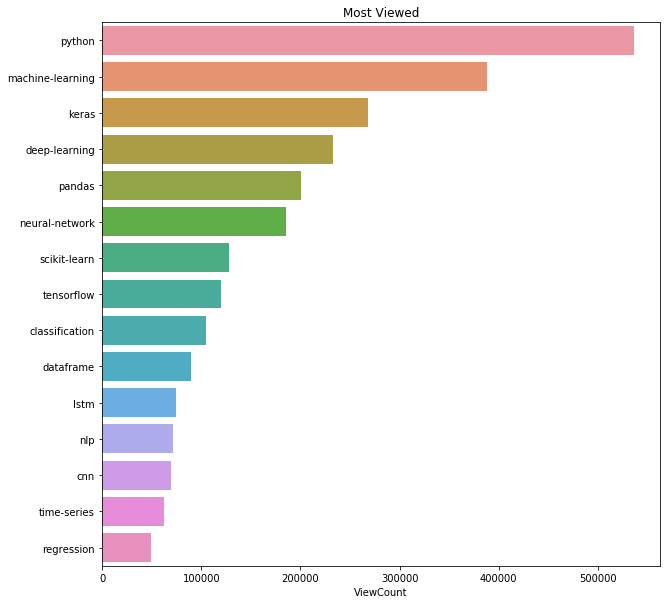

In [15]:
#Create and convert a dict to a DataFrame.
most_viewed = pd.DataFrame.from_dict(dict_viewed_tags,orient='index', columns = ['ViewCount'])
most_viewed.sort_values("ViewCount", ascending = False,inplace = True)

#Graph the first row of this DataFrame
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.barplot(x = most_viewed.head(15).ViewCount, y = most_viewed.head(15).index)
plt.title("Most Viewed")
plt.show()

通过图表，我们可以发现python和机器学习是最多人查阅的话题。

In [16]:
#Merge two DataFrame for the future use.
in_used = pd.merge(most_used, most_viewed, how="left", left_index=True, right_index=True)
in_used.sort_values('ViewCount',ascending = False,inplace = True)

Here's a list of the tags in common: python, machine-learning, deep-learning, neural-network, keras, tensorflow, classification, scikit-learn.

Are there strong relations between them. Like, Does python has a strong relationship with machine_learning? etc (它们之间是否存在牢固的关系。 例如，python是否与machine_learning有很强的关系？ 等等)

In [17]:
relation = pd.DataFrame(index = most_used.head(15).index,columns = most_used.head(15).index)
relation.fillna(0,inplace=True)

for tags in science_questions["Tags"]:
    for row in relation.index:
        for col in relation.columns:
            if (row in tags) and (col in tags):
                if relation.loc[row,col] == 0:
                    relation.loc[row,col] = 1
                else:
                    relation.loc[row,col] += 1
        
relation

,machine-learning,python,deep-learning,neural-network,keras,classification,tensorflow,scikit-learn,nlp,cnn,time-series,lstm,pandas,regression,dataset
machine-learning,2693,499,429,366,195,259,106,188,113,124,131,71,62,119,99
python,499,1814,160,137,280,98,167,235,71,62,105,61,244,59,53
deep-learning,429,160,1220,305,247,59,136,16,72,160,44,103,1,21,32
neural-network,366,137,305,1055,235,65,108,24,24,118,33,69,1,42,20
keras,195,280,247,235,935,58,256,34,23,116,51,133,3,31,13
classification,259,98,59,65,58,685,20,47,35,20,25,20,3,34,28
tensorflow,106,167,136,108,256,20,584,15,11,57,9,43,3,9,9
scikit-learn,188,235,16,24,34,47,15,540,12,0,12,2,37,37,9
nlp,113,71,72,24,23,35,11,12,493,7,0,19,3,2,11
cnn,124,62,160,118,116,20,57,0,7,489,8,24,1,6,11


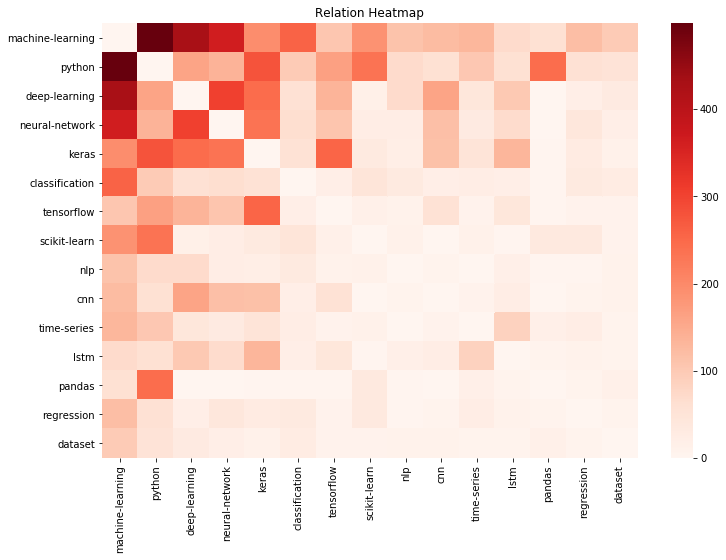

In [18]:
for i in range(relation.shape[0]):
    relation.iloc[i][i] = 0

plt.figure(figsize=(12,8))
sns.heatmap(relation,cmap='Reds')
plt.title("Relation Heatmap")
plt.show()

通过图像，Python和machine-learning有着很重要的关系

Think about what questions should be classified as deep learning questions and the implement that definition. （考虑应该将哪些问题归类为深度学习问题，并进行定义。）

1. Keras and TensorFlow are deep-learning software.
2. Cnn is a class of deep-learning.
3. Classification is one of the most active research and application area of neural networks 
4. NLP - Natural language processing (NLP) is one of the most important technologies of the information age.Recently, deep learning approaches have obtained very high performance across many different NLP tasks.
5. Long short-term memory (LSTM) is an artificial recurrent neural network (RNN) architecture[1] used in the field of deep learning.

通过网上的资料，上述的问题类型可以归类为深度学习问题

In [19]:
deeplearning_question = pd.read_csv("2019_questions.csv", parse_dates=["CreationDate"])
deeplearning_question["Tags"] = deeplearning_question["Tags"].str.replace("<", "").str.replace(">"," ").str.split()
#深度学习问题 
deeplearining_list = ['lstm','keras','cnn','nlp','classification','tensorflow','neural-network', 'deep-learning','lstm']

def define_deeplearining(tags):
    for tag in tags:
        if tag in deeplearining_list:
             return True
        else:
             define_deeplearining(tag[1:]) 

deeplearning_question["DeepLearning"] = deeplearning_question["Tags"].apply(define_deeplearining)

deeplearning_question["DeepLearning"].fillna(False,inplace=True)

deeplearning_question[['Id','CreationDate',"Tags",'DeepLearning']].sample(5)

,Id,CreationDate,Tags,DeepLearning
5840,52357,2019-05-22 00:17:38,"[machine-learning, python, classification, ker...",True
2802,58753,2019-09-05 19:04:19,"[python, scikit-learn, logistic-regression]",False
4789,62411,2019-10-30 11:26:54,"[r, data, visualization]",False
2131,58266,2019-08-27 13:04:12,"[keras, cnn, object-detection]",True
7613,64875,2019-12-15 13:31:36,"[machine-learning, neural-network, cnn, image-...",True


Count how many deep learning questions are asked per time period.
（计算出每个时间段有多少个深度学习问题。）

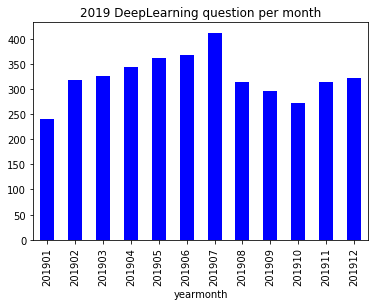

In [20]:
deeplearning_question['yearmonth'] = deeplearning_question['CreationDate'].dt.year*100 + deeplearning_question['CreationDate'].dt.month

deeplearning_question_true = deeplearning_question[deeplearning_question["DeepLearning"] == True].groupby('yearmonth')

deeplearning_question_true['DeepLearning'].sum().plot(kind = 'bar', title = "2019 DeepLearning question per month",color='blue'
                                                     ,linestyle='dashed')